# In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

'Daily Time Spent on Site': consumer time on site in minutes
'Age': cutomer age in years
'Area Income': Avg. Income of geographical area of consumer
'Daily Internet Usage': Avg. minutes a day consumer is on the internet
'Ad Topic Line': Headline of the advertisement
'City': City of consumer
'Male': Whether or not consumer was male
'Country': Country of consumer
'Timestamp': Time at which consumer clicked on Ad or closed window
'Clicked on Ad': 0 or 1 indicated clicking on Ad


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'E:\notes\noorain_python\Python Class(09-Aug)\project\Logistic-Regression\advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


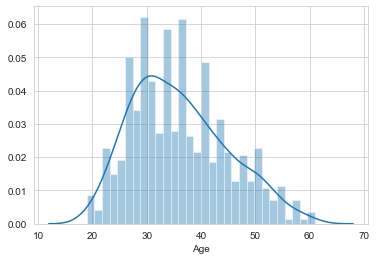

In [5]:
sns.set_style('whitegrid')
sns.distplot(df['Age'], bins = 30, kde=True)

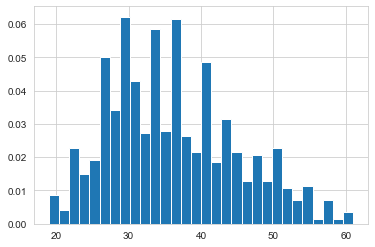

In [6]:
plt.hist(df['Age'], bins=30, density=True)
plt.show()

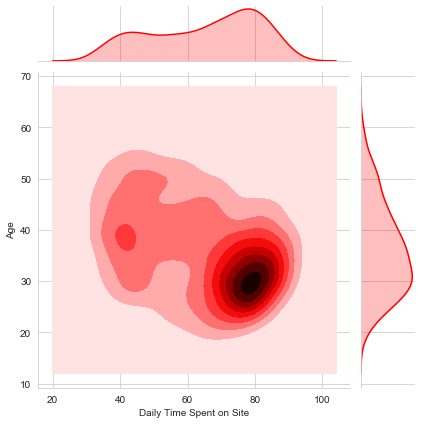

In [7]:
sns.jointplot(df['Daily Time Spent on Site'], df['Age'], kind = 'kde', color = 'red')

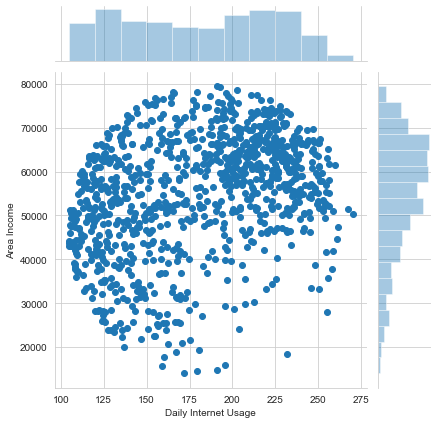

In [12]:
sns.jointplot(df['Daily Internet Usage'], df['Area Income'], kind = 'scatter')

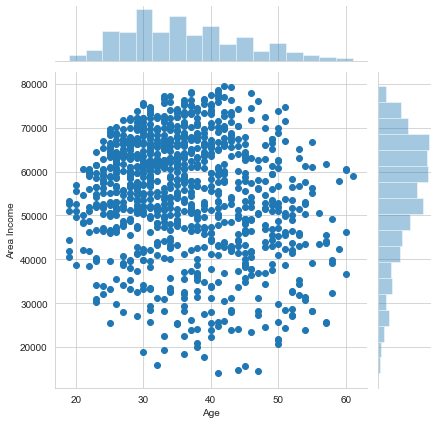

In [20]:
sns.jointplot(df['Age'], df['Area Income'], kind = 'scatter')

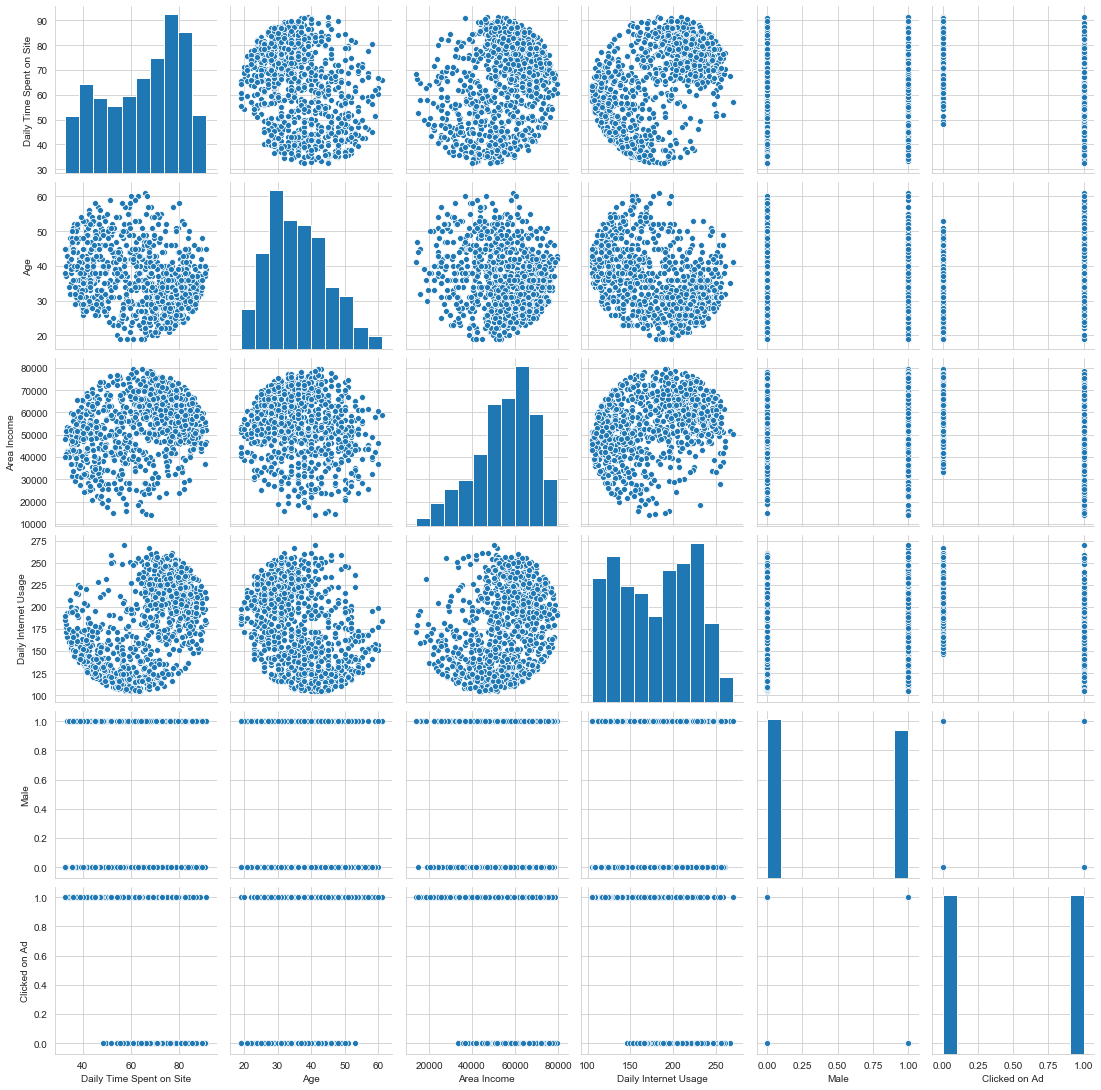

In [16]:
sns.pairplot(df)

In [18]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [38]:
df1 = df.drop(['Ad Topic Line','City','Country','Timestamp'], axis=1)

In [39]:
X = df1[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = df1['Clicked on Ad']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
ran = RandomForestClassifier(n_estimators=200)

In [63]:
ran.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
ran.score(X_test, y_test)

0.95

In [65]:
ran = RandomForestClassifier(n_estimators=100)

In [66]:
ran.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
ran.score(X_test, y_test)

0.9433333333333334

In [68]:
ran = RandomForestClassifier(n_estimators=50)
ran.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
ran.score(X_test, y_test)

0.9466666666666667

In [72]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [73]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
tree.score(X_test, y_test)

0.9233333333333333

In [75]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [76]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
log.score(X_test, y_test)

0.9166666666666666

In [78]:
from sklearn.svm import SVC

In [79]:
svc = SVC(kernel = 'linear')

In [80]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
svc.score(X_test, y_test)

0.9633333333333334

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
cross_val_score(LogisticRegression(), X_train, y_train, cv = 4)

array([0.82857143, 0.88571429, 0.90285714, 0.93142857])

In [91]:
cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv = 4)

array([0.94857143, 0.92      , 0.92      , 0.96      ])

In [93]:
cross_val_score(SVC(kernel = 'linear'), X_train, y_train, cv = 4)

array([0.96571429, 0.93142857, 0.95428571, 0.98285714])

In [95]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.05900335, 6.4209672 , 0.05900335, 3.462398  , 0.05940337,
        6.95059757]),
 'std_fit_time': array([2.19107967e-03, 1.16492644e+00, 6.32485100e-04, 1.41816464e+00,
        4.89823515e-04, 2.39450810e+00]),
 'mean_score_time': array([0.01380072, 0.00140014, 0.01360083, 0.00160012, 0.01360073,
        0.00160007]),
 'std_score_time': array([0.00039988, 0.00048986, 0.00048998, 0.00048986, 0.0004899 ,
        0.00048992]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [96]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059003,0.002191,0.013801,0.00040,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.514286,0.521429,0.521429,0.521429,0.521429,0.520000,0.002857,4
1,6.420967,1.164926,0.001400,0.00049,1,linear,"{'C': 1, 'kernel': 'linear'}",0.985714,0.957143,0.964286,0.942857,0.978571,0.965714,0.015253,3
2,0.059003,0.000632,0.013601,0.00049,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.514286,0.521429,0.521429,0.521429,0.521429,0.520000,0.002857,4
3,3.462398,1.418165,0.001600,0.00049,10,linear,"{'C': 10, 'kernel': 'linear'}",0.985714,0.957143,0.964286,0.964286,0.978571,0.970000,0.010498,1
4,0.059403,0.000490,0.013601,0.00049,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.514286,0.521429,0.521429,0.521429,0.521429,0.520000,0.002857,4
5,6.950598,2.394508,0.001600,0.00049,20,linear,"{'C': 20, 'kernel': 'linear'}",0.985714,0.950000,0.964286,0.957143,0.985714,0.968571,0.014708,2


In [97]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.520000
1,1,linear,0.965714
2,10,rbf,0.520000
3,10,linear,0.970000
4,20,rbf,0.520000
5,20,linear,0.968571


In [102]:
clf = GridSearchCV(RandomForestClassifier(),{
        'n_estimators':[10, 50, 100, 200]
    }, cv = 5,
return_train_score=False)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [103]:
clf.cv_results_

{'mean_fit_time': array([0.03120179, 0.11700678, 0.24461403, 0.46562662]),
 'std_fit_time': array([0.00541882, 0.00063256, 0.00781322, 0.00649963]),
 'mean_score_time': array([0.00400014, 0.00900035, 0.01700101, 0.03080177]),
 'std_score_time': array([6.32409699e-04, 9.53674316e-08, 1.16800773e-07, 7.48328219e-04]),
 'param_n_estimators': masked_array(data=[10, 50, 100, 200],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 50},
  {'n_estimators': 100},
  {'n_estimators': 200}],
 'split0_test_score': array([0.96428571, 0.97857143, 0.97142857, 0.97857143]),
 'split1_test_score': array([0.94285714, 0.93571429, 0.95714286, 0.95      ]),
 'split2_test_score': array([0.97857143, 0.95714286, 0.95714286, 0.96428571]),
 'split3_test_score': array([0.95714286, 0.95      , 0.95      , 0.95      ]),
 'split4_test_score': array([0.96428571, 0.96428571, 0.96428571, 0.97142857]),
 'mean_test_scor

In [104]:
df3 = pd.DataFrame(clf.cv_results_)

In [105]:
df3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031202,0.005419,0.004000,6.324097e-04,10,{'n_estimators': 10},0.964286,0.942857,0.978571,0.957143,0.964286,0.961429,0.011606,2
1,0.117007,0.000633,0.009000,9.536743e-08,50,{'n_estimators': 50},0.978571,0.935714,0.957143,0.950000,0.964286,0.957143,0.014286,4
2,0.244614,0.007813,0.017001,1.168008e-07,100,{'n_estimators': 100},0.971429,0.957143,0.957143,0.950000,0.964286,0.960000,0.007284,3
3,0.465627,0.006500,0.030802,7.483282e-04,200,{'n_estimators': 200},0.978571,0.950000,0.964286,0.950000,0.971429,0.962857,0.011429,1


In [109]:
df3 = df3[['param_n_estimators','mean_test_score']]
df3

,param_n_estimators,param_n_estimators,param_n_estimators,param_n_estimators,mean_test_score
0,10,10,10,10,0.961429
1,50,50,50,50,0.957143
2,100,100,100,100,0.960000
3,200,200,200,200,0.962857
